## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

**Description of the data**

*Variables of interest in the dataset*
*   Year
*   ID
*   Religion: What is your religious preference? Is it Protestant, Catholic, Jewish, some other religion, or no religion?
*   Religion raised: In what religion were you raised?
*   Happiness: Taken all together, how would you say things are these days--would you say that you are very happy, pretty happy, or not too happy?
*   Happiness of marriage: Taking things all together, how would you describe your marriage? Would you say that your marriage is very happy, pretty happy, or not too happy?
*   Confidence in scientific community: I am going to name some institutions in this country. As far as the people running these institutions are concerned, would you say you have a great deal of confidence, only some confidence, or hardly any confidence at all in them?
*   View of others: Would you say that most of the time people try to be helpful, or that they are mostly just looking out for themselves?
*   Fairness in humanity: Do you think most people would try to take advantage of you if they got a chance, or would they try to be fair?
*   Trust in others: Generally speaking, would you say that most people can be trusted or that you can't be too careful in dealing with people

*Motivation*

The data that I chose centers around how religion affect, and if there are any effects and patterns, their happiness and perspective of other people and the world. I grew up and was raised as non-religious because of my parents' beliefs, but I have had many friends and even close family members who are religious or decided to attend church. One of my childhood best friends grew up very religious, but later decided to leave the church. While I grew up non-religious, I was always interested in the idea of religion because I saw how people turned to their religious beliefs in times of harship, or how their belief faltered in times of harship.

Religion is a fundamental aspect of people's lives and dictates their actions and beliefs. It is something that people consider when they choose their life partner, who they surround themselves with, what they do on the weekend, and how they view their purpose in life. Religion is also interesting because of its significant impact on people's lives, but yet there is a wide diversity in beliefs between religions and how people practice them.  

I chose the variables of interest to create a dataset to explore if there are any relationships between religion, happiness in life and marriage, and their view of the world and other people (focusing on key concepts such as trust, helping others, and fairness). Additionally, often times a common reason for people to not believe in a religion is because of their belief that it contradicts science; people who do not follow a religion tend to cite the fact that there is no evidence of God or afterlife as their reason for remaining non-religious. As a result, I also added a variable about their confidence in the scientific community to see if there are any relationships between science and religion.

In [50]:
!git clone https://github.com/siwenliao/EDA

Cloning into 'EDA'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 53 (delta 13), reused 25 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 8.79 MiB | 20.88 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading dataset
df = pd.read_csv('./GSS_religion.csv')

# Rename variables to better describe the data recorded
df = df.rename(columns = {'relig': 'religion',
                          'relig16': 'religion_raised',
                          'happy': 'happiness',
                          'hapmar': 'happiness_marriage',
                          'consci': 'conf_in_science'})

# Printing the beginning and end of the dataset to understand what needs
# to be cleaned
print(df.head(),'\n')
print(df.tail(),'\n')

# Printing the unique values of the variable to understand how dirty
# the data is

# Here, inapplicable may mean that someone is religious, hence it is not considered
# a missing value. Similar idea with "I don't know."

print(df['religion'].unique(),'\n')
df['religion'] = df['religion'].replace(['.n:  No answer', '.s:  Skipped on Web'],
                                        np.nan)
df['religion'] = df['religion'].replace('.d:  Do not Know/Cannot Choose',
                                        "Don't know")


# Repeating the process for other variables
print(df['religion_raised'].unique(),'\n')

df['religion_raised'] = df['religion_raised'].replace([ '.n:  No answer',
                                                       '.s:  Skipped on Web'],
                                                      np.nan)
df['religion_raised'] = df['religion_raised'].replace('.d:  Do not Know/Cannot Choose',
                                                      "Don't know")
df['religion_raised'] = df['religion_raised'].replace('.i:  Inapplicable',
                                                      'Inapplicable')

print(df['happiness_marriage'].unique(),'\n')
# Inapplicable may mean that someone is not married
df['happiness_marriage'] = df['happiness_marriage'].replace('.i:  Inapplicable',
                                                            'Inapplicable')
df['happiness_marriage'] = df['happiness_marriage'].replace(['.n:  No answer',
                                                             '.s:  Skipped on Web'],
                                                            np.nan)
df['happiness_marriage'] = df['happiness_marriage'].replace('.d:  Do not Know/Cannot Choose',
                                                            "DON'T KNOW")

# In the following variables, since happiness and views
# on trust, helpfulness, etc. applies to everyone, and there is an option to
# represent each level, responses that do not fall under a valid answer will
# be replaced as NA's
print(df['happiness'].unique(),'\n')
df['happiness'] = df['happiness'].replace(['.n:  No answer', '.s:  Skipped on Web',
                                         '.i:  Inapplicable'],
                                        np.nan)
df['happiness'] = df['happiness'].replace('.d:  Do not Know/Cannot Choose',
                                        "Don't know")

print(df['helpful'].unique(),'\n')
#
df['helpful'] = df['helpful'].replace(['.n:  No answer', '.s:  Skipped on Web',
                                       '.y:  Not available in this year',
                                         '.i:  Inapplicable'],
                                        np.nan)
df['helpful'] = df['helpful'].replace('.d:  Do not Know/Cannot Choose',
                                        "Don't know")
print(df['trust'].unique(),'\n')
df['trust'] = df['trust'].replace(['.n:  No answer',
                                       '.y:  Not available in this year',
                                         '.i:  Inapplicable'],
                                        np.nan)
df['trust'] = df['trust'].replace('.d:  Do not Know/Cannot Choose',
                                        "Don't know")

print(df['fair'].unique(),'\n')
df['fair'] = df['fair'].replace(['.n:  No answer',
                                       '.y:  Not available in this year',
                                         '.i:  Inapplicable'],
                                        np.nan)
df['fair'] = df['fair'].replace('.d:  Do not Know/Cannot Choose',
                                        "Don't know")

print(df['conf_in_science'].unique(),'\n')

df['conf_in_science'] = df['conf_in_science'].replace(['.n:  No answer',
                                                       '.s:  Skipped on Web',
                                                       '.i:  Inapplicable'],
                                                      np.nan)
df['conf_in_science'] = df['conf_in_science'].replace('.d:  Do not Know/Cannot Choose',
                                                      "DON'T KNOW")



   year  id_    religion    religion_raised      happiness happiness_marriage  \
0  1972    1      Jewish  .i:  Inapplicable  Not too happy  .i:  Inapplicable   
1  1972    2    Catholic  .i:  Inapplicable  Not too happy  .i:  Inapplicable   
2  1972    3  Protestant  .i:  Inapplicable   Pretty happy  .i:  Inapplicable   
3  1972    4       Other  .i:  Inapplicable  Not too happy  .i:  Inapplicable   
4  1972    5  Protestant  .i:  Inapplicable   Pretty happy  .i:  Inapplicable   

                      helpful                         fair  \
0  Looking out for themselves         Would try to be fair   
1           Try to be helpful         Would try to be fair   
2  Looking out for themselves  Would take advantage of you   
3  Looking out for themselves         Would try to be fair   
4  Looking out for themselves         Would try to be fair   

                        trust    conf_in_science  
0                     Depends  .i:  Inapplicable  
1  Most people can be trusted  .i:  In

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Jewish'),
  Text(1, 0, 'Catholic'),
  Text(2, 0, 'Protestant'),
  Text(3, 0, 'Other'),
  Text(4, 0, "Don't know"),
  Text(5, 0, 'Inter-Nondenominational'),
  Text(6, 0, 'Christian'),
  Text(7, 0, 'Muslim/Islam'),
  Text(8, 0, 'Buddhism'),
  Text(9, 0, 'Orthodox-Christian'),
  Text(10, 0, 'Native American'),
  Text(11, 0, 'Hinduism'),
  Text(12, 0, 'Other Eastern religions')])

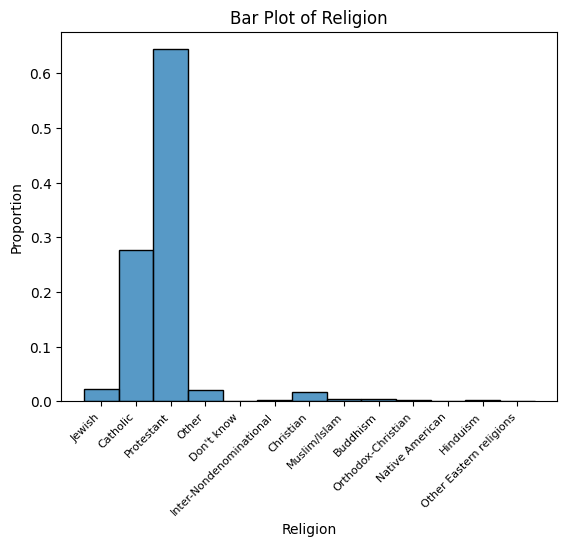

In [52]:
import seaborn as sns
bar_rel=sns.histplot(data=df,x='religion',stat='proportion')
bar_rel.set(title='Bar Plot of Religion', xlabel = 'Religion', ylabel='Proportion')
plt.xticks(rotation=45, ha='right', fontsize=8)

In [55]:
df['religion'].value_counts()

,count
religion,
Protestant,41530
Catholic,17891
Jewish,1468
Other,1301
Christian,1070
Buddhism,299
Muslim/Islam,242
Orthodox-Christian,207
Hinduism,189


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Inapplicable'),
  Text(1, 0, 'Protestant'),
  Text(2, 0, 'Catholic'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Jewish'),
  Text(5, 0, "Don't know"),
  Text(6, 0, 'Christian'),
  Text(7, 0, 'Inter-Nondenominational'),
  Text(8, 0, 'Hinduism'),
  Text(9, 0, 'Buddhism'),
  Text(10, 0, 'Orthodox-Christian'),
  Text(11, 0, 'Muslim/Islam'),
  Text(12, 0, 'Other Eastern religions'),
  Text(13, 0, 'Native American')])

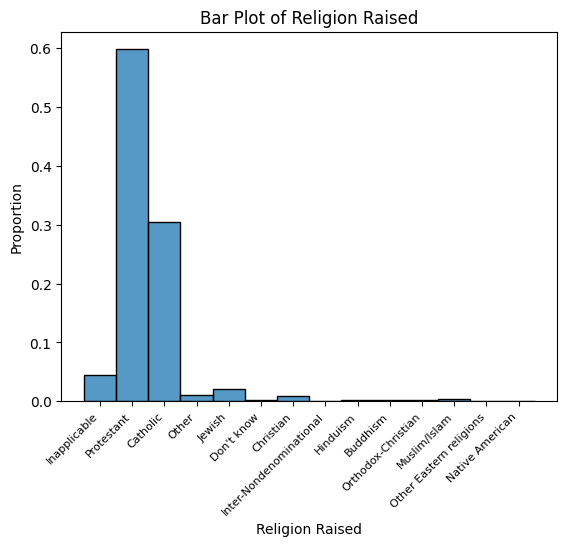

In [53]:
bar_rais=sns.histplot(data=df,x='religion_raised',stat='proportion')
bar_rais.set(title='Bar Plot of Religion Raised', xlabel = 'Religion Raised', ylabel='Proportion')
plt.xticks(rotation=45, ha='right', fontsize=8)

([0, 1, 2, 3],
 [Text(0, 0, 'Not too happy'),
  Text(1, 0, 'Pretty happy'),
  Text(2, 0, 'Very happy'),
  Text(3, 0, "Don't know")])

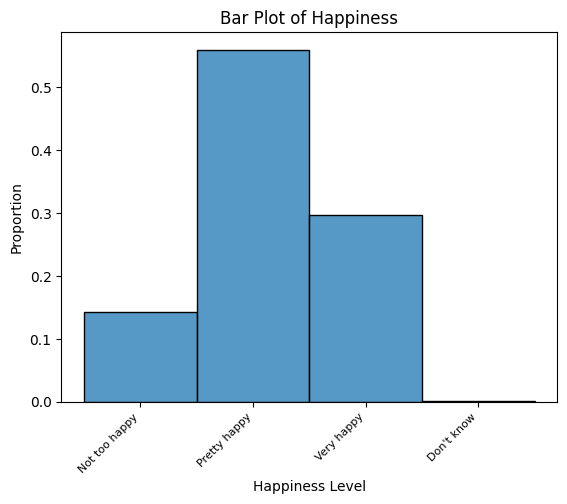

In [54]:
bar_hap=sns.histplot(data=df,x='happiness',stat='proportion')
bar_hap.set(title='Bar Plot of Happiness', xlabel = 'Happiness Level', ylabel='Proportion')
plt.xticks(rotation=45, ha='right', fontsize=8)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Inapplicable'),
  Text(1, 0, 'VERY HAPPY'),
  Text(2, 0, 'PRETTY HAPPY'),
  Text(3, 0, 'NOT TOO HAPPY'),
  Text(4, 0, "DON'T KNOW")])

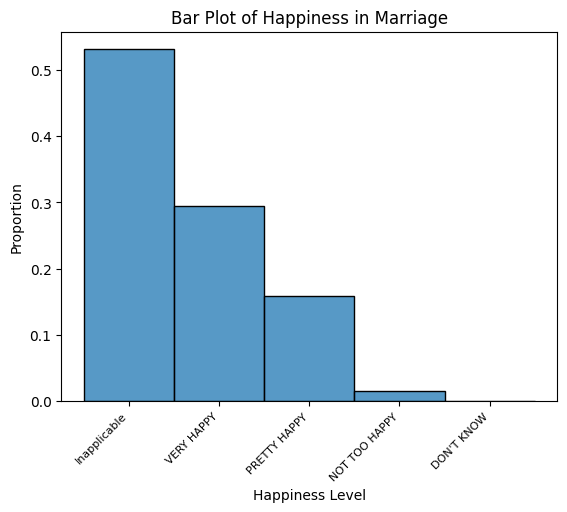

In [60]:
bar_hap_mar=sns.histplot(data=df,x='happiness_marriage',stat='proportion')
bar_hap_mar.set(title='Bar Plot of Happiness in Marriage', xlabel = 'Happiness Level', ylabel='Proportion')
plt.xticks(rotation=45, ha='right', fontsize=8)

([0, 1, 2, 3],
 [Text(0, 0, 'Would try to be fair'),
  Text(1, 0, 'Would take advantage of you'),
  Text(2, 0, 'Depends'),
  Text(3, 0, "Don't know")])

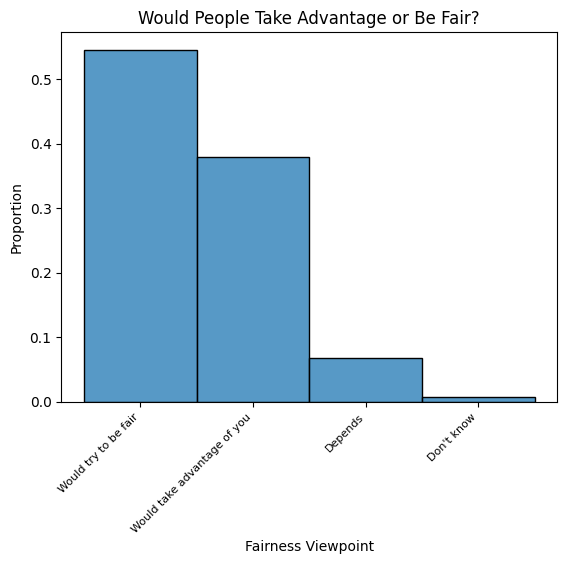

In [69]:
bar_fair=sns.histplot(data=df,x='fair',stat='proportion')
bar_fair.set(title='Would People Take Advantage or Be Fair?',
             xlabel = 'Fairness Viewpoint', ylabel='Proportion')
plt.xticks(rotation=45, ha='right', fontsize=8)

([0, 1, 2, 3],
 [Text(0, 0, 'Depends'),
  Text(1, 0, 'Most people can be trusted'),
  Text(2, 0, "Can't be too careful"),
  Text(3, 0, "Don't know")])

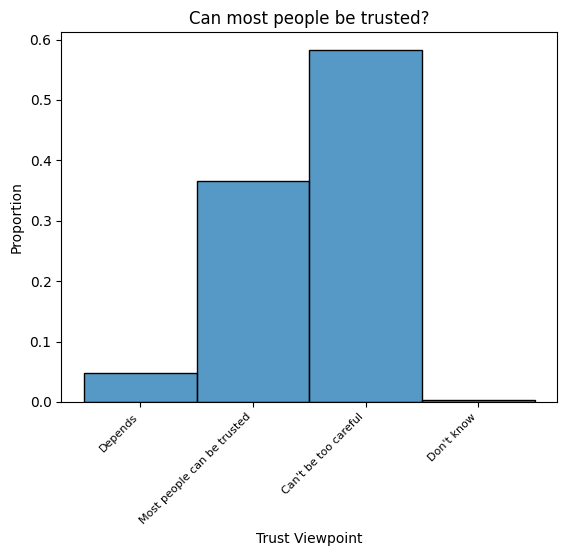

In [78]:
bar_trust=sns.histplot(data=df,x='trust',stat='proportion')
bar_trust.set(title='Can most people be trusted?',
             xlabel = 'Trust Viewpoint', ylabel='Proportion')
plt.xticks(rotation=45, ha='right', fontsize=8)

([0, 1, 2, 3],
 [Text(0, 0, 'Looking out for themselves'),
  Text(1, 0, 'Try to be helpful'),
  Text(2, 0, 'Depends'),
  Text(3, 0, "Don't know")])

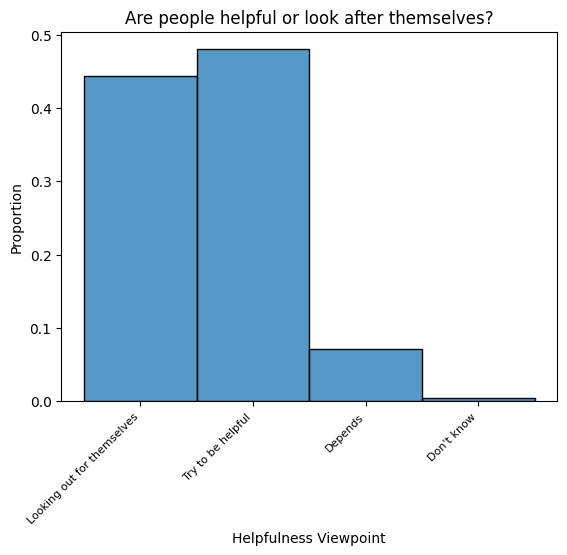

In [71]:
bar_help=sns.histplot(data=df,x='helpful',stat='proportion')
bar_help.set(title='Are people helpful or look after themselves?',
             xlabel = 'Helpfulness Viewpoint', ylabel='Proportion')
plt.xticks(rotation=45, ha='right', fontsize=8)

([0, 1, 2, 3],
 [Text(0, 0, 'ONLY SOME'),
  Text(1, 0, 'A GREAT DEAL'),
  Text(2, 0, "DON'T KNOW"),
  Text(3, 0, 'HARDLY ANY')])

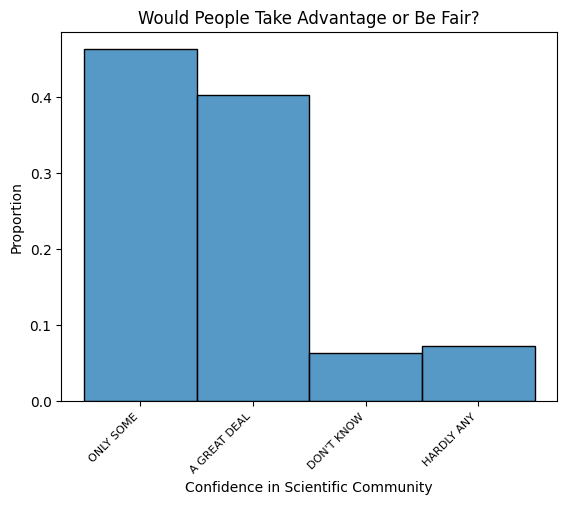

In [79]:
bar_science=sns.histplot(data=df,x='conf_in_science',stat='proportion')
bar_science.set(title='Would People Take Advantage or Be Fair?',
             xlabel = 'Confidence in Scientific Community', ylabel='Proportion')
plt.xticks(rotation=45, ha='right', fontsize=8)

In [57]:
pd.crosstab(df['religion'], df['happiness'], normalize='index')

happiness,Don't know,Not too happy,Pretty happy,Very happy
religion,,,,
Buddhism,0.000000,0.156934,0.605839,0.237226
Catholic,0.000775,0.132336,0.566228,0.300661
Christian,0.001045,0.204807,0.525601,0.268548
Don't know,0.012346,0.209877,0.555556,0.222222
Hinduism,0.000000,0.102273,0.568182,0.329545
Inter-Nondenominational,0.000000,0.164286,0.607143,0.228571
Jewish,0.000000,0.143170,0.549306,0.307524
Muslim/Islam,0.000000,0.208889,0.484444,0.306667
Native American,0.000000,0.228571,0.657143,0.114286


In [59]:
pd.crosstab(df['religion'], df['happiness_marriage'], normalize='index')

happiness_marriage,DON'T KNOW,Inapplicable,NOT TOO HAPPY,PRETTY HAPPY,VERY HAPPY
religion,,,,,
Buddhism,0.000000,0.620805,0.023490,0.161074,0.194631
Catholic,0.000672,0.512690,0.013110,0.171494,0.302034
Christian,0.000000,0.631678,0.014058,0.130272,0.223993
Don't know,0.000000,0.654321,0.012346,0.074074,0.259259
Hinduism,0.000000,0.367021,0.037234,0.196809,0.398936
Inter-Nondenominational,0.000000,0.688623,0.011976,0.113772,0.185629
Jewish,0.000000,0.493169,0.014344,0.150956,0.341530
Muslim/Islam,0.000000,0.518672,0.029046,0.153527,0.298755
Native American,0.025641,0.769231,0.000000,0.153846,0.051282


In [66]:
pd.crosstab(df['religion'], df['fair'], normalize='index')

fair,Depends,Don't know,Would take advantage of you,Would try to be fair
religion,,,,
Buddhism,0.113636,0.007576,0.340909,0.537879
Catholic,0.065561,0.007860,0.355890,0.570689
Christian,0.078788,0.004040,0.482828,0.434343
Don't know,0.090909,0.000000,0.636364,0.272727
Hinduism,0.253165,0.000000,0.278481,0.468354
Inter-Nondenominational,0.106667,0.000000,0.360000,0.533333
Jewish,0.077922,0.014168,0.282172,0.625738
Muslim/Islam,0.112069,0.017241,0.508621,0.362069
Native American,0.000000,0.000000,0.600000,0.400000


In [73]:
pd.crosstab(df['religion'], df['trust'], normalize='index')

trust,Can't be too careful,Depends,Don't know,Most people can be trusted
religion,,,,
Buddhism,0.474820,0.151079,0.007194,0.366906
Catholic,0.574753,0.045206,0.002107,0.377933
Christian,0.727626,0.040856,0.001946,0.229572
Don't know,0.727273,0.113636,0.022727,0.136364
Hinduism,0.459770,0.160920,0.000000,0.379310
Inter-Nondenominational,0.518987,0.113924,0.000000,0.367089
Jewish,0.441805,0.080760,0.007126,0.470309
Muslim/Islam,0.663934,0.081967,0.000000,0.254098
Native American,0.600000,0.050000,0.000000,0.350000


In [75]:
pd.crosstab(df['religion'], df['helpful'], normalize='index')

helpful,Depends,Don't know,Looking out for themselves,Try to be helpful
religion,,,,
Buddhism,0.098485,0.015152,0.409091,0.477273
Catholic,0.068959,0.004501,0.435495,0.491045
Christian,0.089069,0.002024,0.491903,0.417004
Don't know,0.181818,0.022727,0.477273,0.318182
Hinduism,0.151899,0.000000,0.354430,0.493671
Inter-Nondenominational,0.160000,0.000000,0.440000,0.400000
Jewish,0.090695,0.017668,0.396938,0.494700
Muslim/Islam,0.103448,0.000000,0.491379,0.405172
Native American,0.000000,0.000000,0.650000,0.350000


In [76]:
pd.crosstab(df['religion'], df['conf_in_science'], normalize='index')

conf_in_science,A GREAT DEAL,DON'T KNOW,HARDLY ANY,INAPPLICABLE,ONLY SOME
religion,,,,,
Buddhism,0.337793,0.013378,0.023411,0.381271,0.244147
Catholic,0.293488,0.039229,0.037267,0.324311,0.305705
Christian,0.175701,0.020561,0.069159,0.401869,0.332710
Don't know,0.176471,0.011765,0.082353,0.458824,0.270588
Hinduism,0.438503,0.021390,0.048128,0.310160,0.181818
Inter-Nondenominational,0.233533,0.000000,0.041916,0.461078,0.263473
Jewish,0.367235,0.033447,0.019795,0.317406,0.262116
Muslim/Islam,0.322314,0.028926,0.033058,0.363636,0.252066
Native American,0.307692,0.000000,0.025641,0.333333,0.333333


**Findings**

The barplots for the respondents' religion and the religion they were raised at produced similar results, so further analysis on the relationships between religion and happiness and viewpoints of the world focused on the respondents' current religion. It is assumed that the relationship between the region they were raised and the same variables would produce very similar results. Additionally, from the barplots, the majority of respondents identify as protestant (60%). 30% also identify as catholic, so around 90% of respondents identify as potestant or catholic. As a result, the other religions may not be as representatitive due to lack of sample size.

The barplots of overall happiness and happiness in marriages show that majority of people, regardless of religion are pretty happy and very happy in their marriages if applicable. Most people also believe that people would try to be fair, but you cannot be too careful when trusting others. There are split views on the helpfulness of others, and majority of people have at least some trust in the scientific community and institutions.

When analyzing the relationships between religion and happiness, it was found that Native Americans had the lowest proportion of people who were very happy but had the highest proportion of people who were pretty happy. Hinduism and other Eastern religions had the highest proportion of people who identified as very happy. Native American, Muslim/Islam, Christian, and Don't Know had relatively similar proportions of respondents who identified as not too happy. There is no strong indicator that a certain religion is happier and less happy. Most people are generally happy and have a good gage as to how happy they are.

For the relationship between religion and happiness in marriage, the largest proportion of inapplicable responses were from Native Americans. Those who identify as Jewish have the highest proportion for being very happy in their marriage, whereas Native American, Inter-Nondenominational, and Buddhism have the lowest. People are generally happy in their marriages if applicable, and there are several religions that have slightly lower or higher happiness levels. However, it can be noted that the sample sizes for the listed religions are smaller, so an individual answer has more power to skew the distribution.

For the relationship between religion and fairness, Jewish people have the highes proportion of respondents who believe that people would try to be fair. People who don't know or identify as Native American have the highest proportions of respondents who believe people would try to take advantage of you. It can also be noted that a larger proportion of Christians and Muslims/Islams believe that people who will take advantage rather than try to be fair, contrasting most of the religions having a larger portion of respondents believing in fairness.

For the relationship between religion and fairness, Jewish people have the highes proportion of respondents who believe in trusting others. People who are Christian or Don't Know have the highest proportion of respondents who believe that you cannot be too careful.

For the relationship between religion and helpfulness, the proportions look relatively uniform compared to the other results. The answers are relatively evenly split between people looking out for themselves and trying to be helpful. The relationship between religion and the confidence of science shows that people who identify with Hinduism tend to be the most enthusiastic of the science community, whereas most other people just have at least some belief.

Overall, the EDA shows that Jewish people tend to have the most trust and believe in fairness over other religions. Native American people tend be the most skeptical, which could possibly be attributed to historical injustices their communities have faced. However, in general, religion does not seem to play a large overall in happiness or these fundamental views of the world, as there are no significant patterns leaning towards a conclusion about any particular religion.

